# 1.IMPORT LIBRARIES

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4164\1723629701.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Nat_Gas.csv", parse_dates=["Dates"], index_col="Dates")
C:\Users\KIIT\AppData\Local\Temp\ipykernel_4164\1723629701.py:9: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax.plot_date(dates, prices, '-', label="Historical Prices")


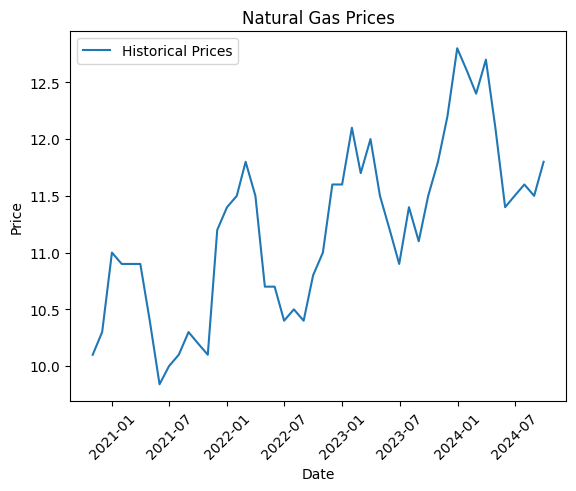

In [29]:
# Load the data from CSV file
# The dataset contains monthly natural gas prices with corresponding dates
df = pd.read_csv("Nat_Gas.csv", parse_dates=["Dates"], index_col="Dates")
prices = df["Prices"].values
dates = df.index.values

# Plot historical prices against dates
fig, ax = plt.subplots()
ax.plot_date(dates, prices, '-', label="Historical Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Natural Gas Prices")
ax.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()



* The graph depicts the historical prices of natural gas over a period spanning approximately three and a half years, from early 2021 to mid-2024.
*  The price exhibits significant fluctuations during this period, with an upward trend forming higher highs . There has not been any liquidity sweeps of buyers at price point of 10.0 thus those traders are enjoying a free market gift as of now .
**Key Observations:**
* **Volatility:** The most striking feature is the high volatility of natural gas prices. There are sharp increases and decreases, indicating a dynamic and unpredictable market.
* **Price Peaks:** Several price peaks are visible, suggesting periods of high demand or supply disruptions.
* **Potential Seasonality:** While not explicitly evident in the provided image, there might be some seasonal patterns in the price fluctuations, which could be influenced by factors like weather conditions (heating demand in winter).
* **Overall Increase:** There appears to be a general upward trend in prices over the entire period, though with significant fluctuations.

In [28]:
# Define start and end dates for data analysis
start_date = date(2020, 10, 31)
end_date = date(2024, 9, 30)
months = []
year = start_date.year
month = start_date.month + 1

In [20]:
# Generate list of month-end dates within the given range
while True:
    current = date(year, month, 1) + timedelta(days=-1)
    months.append(current)
    if current.month == end_date.month and current.year == end_date.year:
        break
    else:
        month = ((month + 1) % 12) or 12
        if month == 1:
            year += 1
        
# Convert month-end dates to days from start_date
days_from_start = [(day - start_date).days for day in months]

In [21]:
def simple_regression(x, y):
    xbar = np.mean(x)
    ybar = np.mean(y)
    slope = np.sum((x - xbar) * (y - ybar)) / np.sum((x - xbar) ** 2)
    intercept = ybar - slope * xbar
    return slope, intercept

# Compute linear trend of prices
time = np.array(days_from_start)
slope, intercept = simple_regression(time, prices)

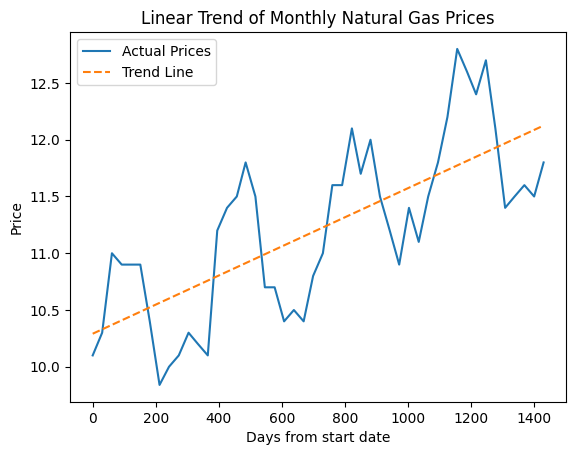

In [22]:
plt.plot(time, prices, label="Actual Prices")
plt.plot(time, time * slope + intercept, label="Trend Line", linestyle="dashed")
plt.xlabel("Days from start date")
plt.ylabel("Price")
plt.title("Linear Trend of Monthly Natural Gas Prices")
plt.legend()
plt.show()

* The actual prices deviate considerably from the linear trend line. This indicates that factors other than the general upward trend are strongly influencing the price movements.The price of natural gas is influenced by a variety of factors, including supply and demand dynamics, weather conditions, geopolitical events, and economic indicators. These factors can lead to sharp price fluctuations and make the market challenging to predict.

In [23]:
# Extract seasonal component using sine and cosine transformations
sin_prices = prices - (time * slope + intercept)
sin_time = np.sin(time * 2 * np.pi / 365)
cos_time = np.cos(time * 2 * np.pi / 365)

In [24]:
# Function to perform bilinear regression to fit seasonal component
def bilinear_regression(y, x1, x2):
    slope1 = np.sum(y * x1) / np.sum(x1 ** 2)
    slope2 = np.sum(y * x2) / np.sum(x2 ** 2)
    return slope1, slope2

In [25]:
# Compute seasonal model parameters
slope1, slope2 = bilinear_regression(sin_prices, sin_time, cos_time)
amplitude = np.sqrt(slope1 ** 2 + slope2 ** 2)
shift = np.arctan2(slope2, slope1)

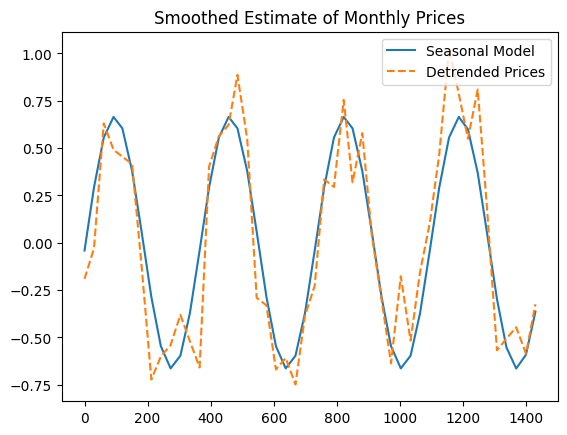

In [26]:
plt.plot(time, amplitude * np.sin(time * 2 * np.pi / 365 + shift), label="Seasonal Model")
plt.plot(time, sin_prices, label="Detrended Prices", linestyle="dashed")
plt.title("Smoothed Estimate of Monthly Prices")
plt.legend()
plt.show()

**Observations:**

* **Seasonal Component:** The blue line represents the "Seasonal Model," suggesting a clear seasonal pattern in the data. This pattern likely indicates recurring fluctuations in prices over specific periods, such as yearly or quarterly cycles.
* **Detrended Prices:** The orange dashed line represents the "Detrended Prices." This line shows the data after removing the overall trend. This helps to isolate the seasonal component more clearly.
* **Cyclical Nature:** Both the seasonal model and the detrended prices exhibit a cyclical pattern, with regular peaks and troughs. This confirms the presence of seasonality in the data.

**Implications:**

* **Understanding Seasonality:** By identifying the seasonal component, businesses can better anticipate and plan for fluctuations in demand and prices.
* **Inventory Management:** Companies can optimize their inventory levels to better align with seasonal demand patterns.
* **Pricing Strategies:** Businesses can adjust their pricing strategies to account for seasonal variations in demand and potentially capture higher profits during peak seasons.
* **Forecasting:** Incorporating seasonality into forecasting models can improve the accuracy of future price predictions.

**Further Analysis:**

* **Identifying the Seasonality:** Determining the exact frequency of the seasonal cycles (e.g., annual, quarterly) would be valuable.
* **Amplitude of Seasonality:** Analyzing the amplitude of the seasonal fluctuations can provide insights into the magnitude of price variations due to seasonal factors.
* **Decomposition:** Decomposing the time series into its trend, seasonal, and residual components can provide a more comprehensive understanding of the underlying factors driving price movements.

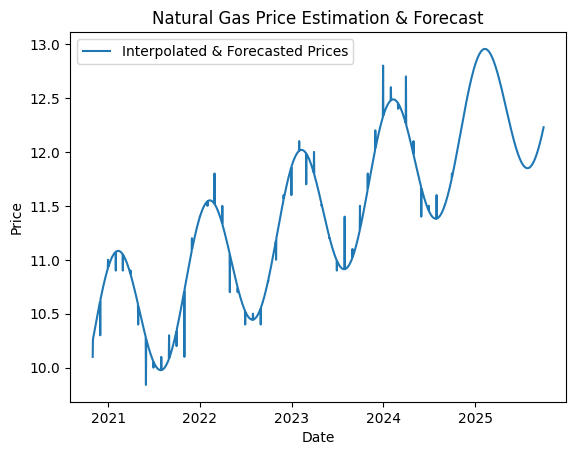

Estimated price on 20th February 2025: 12.941827155396126


In [30]:
def interpolate(date):
    days = (date - pd.Timestamp(start_date)).days
    if days in days_from_start:
        return prices[days_from_start.index(days)]
    else:
        return amplitude * np.sin(days * 2 * np.pi / 365 + shift) + days * slope + intercept

# Generate continuous dates for visualization, including one-year extrapolation
continuous_dates = pd.date_range(start=pd.Timestamp(start_date), end=pd.Timestamp(end_date) + pd.DateOffset(years=1), freq='D')

# Plot estimated prices using interpolation and extrapolation
plt.plot(continuous_dates, [interpolate(date) for date in continuous_dates], label='Interpolated & Forecasted Prices')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Natural Gas Price Estimation & Forecast")
plt.legend()
plt.show()

# Example usage: Predicting the price for a future date
print("Estimated price on 20th February 2025:", interpolate(pd.Timestamp("2025-02-20")))


* **Conclusion:** Seasonality plays a significant role in natural gas prices, and understanding these patterns is somewhat difficult and crucial , it is the part of luck and favour that plays role in the market , the traders who are lucky enough to get the right price at the right time are the winners of the market . 

## RESULT: 
* Estimated price on **20th February 2025:** **12.941827155396126** by observing is yet crucial parts are to be further analysed to get the exact prediction price of the natural gas in the future.